# AAI-530 Group 2 Final Project
## Drone Telemetry Data - Cleaning and Exploratory Data Analysis
**Members:** Andrew Fennimore, Joseph Edwards, Aleksey Matsarski

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Set black background with green accent theme for all plots
plt.style.use("dark_background")
GREEN = "#2ecc71"
DARK_GREEN = "#27ae60"
LIGHT_GREEN = "#82e0aa"
BG_COLOR = "#1a1a2e"

## Section 1: Load and Inspect Raw Data
Load the drone operations CSV and examine the raw data structure.

In [219]:
csv_path = "Supplemental Drone Telemetry Data - Drone Operations Log.csv"

# Load data, skipping malformed rows (some rows have unquoted commas in fields)
df_raw = pd.read_csv(csv_path, on_bad_lines = "warn") #using warn to see if any of the data is bad

print(f"Shape: {df_raw.shape}")
df_raw.head()

Shape: (552, 22)


C:\Users\fenn3\AppData\Local\Temp\ipykernel_68536\4294434181.py:4: ParserWarning: Skipping line 28: expected 22 fields, saw 23
Skipping line 75: expected 22 fields, saw 23

  df_raw = pd.read_csv(csv_path, on_bad_lines = "warn") #using warn to see if any of the data is bad


,Drone ID,Application,Drone Size,Drone Model,Manufacturer,Propeller Count,Max Carry Weight (kg),Actual Carry Weight (kg),Payload Type,Payload Description,...,Distance Flown (km),Operator ID,Flight Date,Battery Remaining (%),GPS Accuracy (meters),Wind Speed (m/s),Obstacles Encountered,Flight Status,Regulatory Approval ID,Notes
0,D001,Package Delivery,Medium,FlyHigh 300,AeroCorp,4,5.0,2.5,Package,Small consumer goods,...,8.0,OP001,2025-03-20,85,2.1,3.5,No,Completed,REG-2025-ABC-123,"Urban delivery, light package, good weather"
1,D002,Infrastructure Inspection,Large,Inspecta X,SkyView Inc.,6,15.0,8.0,"Camera, Sensor","High-resolution camera, thermal sensor",...,15.0,OP002,2025-03-21,68,1.8,6.2,Yes,Completed,REG-2025-DEF-456,"Bridge inspection, carried specialized equipment"
2,D003,Agricultural Spraying,Large,CropMaster,AgriDrones,8,20.0,18.0,Liquid Tank,Pesticide solution,...,10.0,OP003,2025-03-22,40,3.5,7.8,Yes,Completed,REG-2025-GHI-789,"Field spraying, full tank, moderate wind"
3,D004,Aerial Photography,Small,SnapShot Mini,PhotoFly,4,1.0,0.5,Camera,Lightweight action camera,...,5.0,OP004,2025-03-23,92,1.2,2.1,No,Completed,REG-2025-JKL-012,"Recreational use, clear skies"
4,D005,Surveillance,Medium,Watcher Pro,SecureTech,4,7.0,3.0,"Camera, Sensor","Infrared camera, motion detection sensor",...,12.0,OP005,2025-03-24,55,2.5,4.9,No,Completed,REG-2025-MNO-345,"Security patrol, nighttime operation"


In [220]:
df_raw.info() #let's see what we are working with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drone ID                   552 non-null    object 
 1   Application                552 non-null    object 
 2   Drone Size                 552 non-null    object 
 3   Drone Model                552 non-null    object 
 4   Manufacturer               552 non-null    object 
 5   Propeller Count            552 non-null    int64  
 6   Max Carry Weight (kg)      552 non-null    float64
 7   Actual Carry Weight (kg)   550 non-null    float64
 8   Payload Type               552 non-null    object 
 9   Payload Description        552 non-null    object 
 10  Altitude (meters)          552 non-null    int64  
 11  Flight Duration (minutes)  550 non-null    float64
 12  Distance Flown (km)        552 non-null    float64
 13  Operator ID                552 non-null    object 

The only sections without values are the Flight Duration, and Actual Carry Weight. The note section may be useful to determine why the values aren't there or if there was issues, but likely will not be needed for the data analysis section 

## Section 2: Initial Discovery - Identify Data Quality Issues
Examine the raw data for anomalies, missing values, invalid entries, and potential duplicates.

In [246]:
# Descriptive statistics for numerical columns
desc = df_raw.describe()
for col in desc.columns:
    desc[col] = desc[col].map("{:.2f}".format)
desc

,Propeller Count,Max Carry Weight (kg),Actual Carry Weight (kg),Altitude (meters),Flight Duration (minutes),Distance Flown (km),Battery Remaining (%),GPS Accuracy (meters),Wind Speed (m/s)
count,552.00,552.00,550.00,552.00,550.00,552.00,552.00,552.00,552.00
mean,5.04,7.89,5.91,88.53,30.13,9.19,73.70,2.05,4.50
std,1.68,7.02,6.60,357.55,11.28,3.99,19.91,0.80,2.07
min,4.00,1.00,-0.20,10.00,10.00,2.00,35.00,0.50,1.00
25%,4.00,1.80,0.90,49.50,20.00,6.00,60.00,1.30,2.70
50%,4.00,5.00,2.90,73.00,30.00,8.05,79.00,1.90,3.90
75%,6.00,11.25,6.17,92.25,38.00,12.00,92.00,2.50,5.80
max,8.00,20.00,25.00,8444.00,72.00,28.00,100.00,4.00,12.90


In [222]:
# Missing values per column, just easier to read and see
df_raw.isna().sum()

Drone ID                       0
Application                    0
Drone Size                     0
Drone Model                    0
Manufacturer                   0
Propeller Count                0
Max Carry Weight (kg)          0
Actual Carry Weight (kg)       2
Payload Type                   0
Payload Description            0
Altitude (meters)              0
Flight Duration (minutes)      2
Distance Flown (km)            0
Operator ID                    0
Flight Date                    0
Battery Remaining (%)          0
GPS Accuracy (meters)          0
Wind Speed (m/s)               0
Obstacles Encountered          0
Flight Status                  0
Regulatory Approval ID         0
Notes                        498
dtype: int64

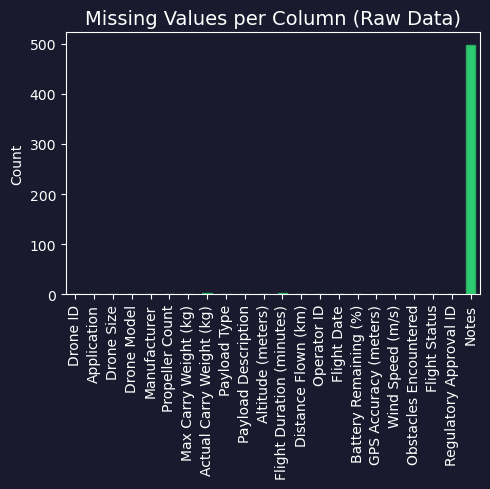

In [223]:
# Visualize missing data before cleaning
fig, ax = plt.subplots(figsize = (5, 5))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
df_raw.isna().sum().plot.bar(ax = ax, color = GREEN, edgecolor = DARK_GREEN)
ax.set_title("Missing Values per Column (Raw Data)", color = "white", fontsize = 14)
ax.set_ylabel("Count", color = "white")
ax.tick_params(axis = "x", rotation = 90, colors = "white")
ax.tick_params(axis = "y", colors = "white")
plt.tight_layout()
plt.show()

In [224]:
# Check unique values for all columns with fewer than 20 distinct values
for col in df_raw.columns:
    if df_raw[col].nunique() < 20:
        print(f"\n{col} ({df_raw[col].nunique()} unique values):")
        print(df_raw[col].value_counts())


Drone Size (5 unique values):
Drone Size
Small     212
Medium    200
Large     138
52          1
523         1
Name: count, dtype: int64

Manufacturer (12 unique values):
Manufacturer
PhotoFly        130
AgriDrones      118
SkyView Inc.     89
AeroCorp         69
DeliveryNow      63
Inspecta X       29
SecureTech       11
EnviroTech       11
GeoSurv          10
RescueFly        10
FilmCraft         6
InventoryAI       6
Name: count, dtype: int64

Propeller Count (3 unique values):
Propeller Count
4    391
8    125
6     36
Name: count, dtype: int64

Payload Type (16 unique values):
Payload Type
Camera                  216
Package                 126
Liquid Tank             109
Sensor                   64
Camera, Sensor           11
Camera, GPS               5
LiDAR System              3
Scanner                   3
First Aid Kit             3
Camera, Beacon            2
Camera, Speaker           2
GPS                       2
Speaker                   2
RFID Reader               2
Commu

We can see some quick and easy changes to the data that we should make. For one, there are 2 values incorrectly formatted in teh Drone Size column. We can see that the Drone Model for both of these is SwiftWing, and throughout the data set, SwiftWing is consistently Small, So I will assume that the two values are small. I will have to look deeper though to see if anything else stand out. 

### Data Quality Issues

In [ ]:
# Issue 1: Invalid Drone Size values
invalid_sizes = df_raw[~df_raw["Drone Size"].isin(["Small", "Medium", "Large"])]
print(f"1. Invalid Drone Size values: {len(invalid_sizes)} rows")
if len(invalid_sizes) > 0:
    display(invalid_sizes[["Drone ID", "Drone Size", "Drone Model"]])

# Issue 2: Negative weights
df_raw["_actual_wt"] = pd.to_numeric(df_raw["Actual Carry Weight (kg)"], errors = "coerce")
neg_weights = df_raw[df_raw["_actual_wt"] < 0]
print(f"\n2. Negative carry weights: {len(neg_weights)} rows")
if len(neg_weights) > 0:
    display(neg_weights[["Drone ID", "Actual Carry Weight (kg)", "Notes"]])

# Issue 3: Overweight records where the actual weight exceeds max carry weight
df_raw["_max_wt"] = pd.to_numeric(df_raw["Max Carry Weight (kg)"], errors = "coerce")
overweight = df_raw[df_raw["_actual_wt"] > df_raw["_max_wt"]]
print(f"\n3. Overweight records (Actual > Max): {len(overweight)} rows")
if len(overweight) > 0:
    display(overweight[["Drone ID", "Max Carry Weight (kg)", "Actual Carry Weight (kg)",
                         "Flight Status", "Notes"]])

# Issue 4: Empty rows, the original dataset has some completely empty rows so double checking
empty_rows = df_raw[df_raw.isna().all(axis = 1)]
print(f"\n4. Completely empty rows: {len(empty_rows)}")

# Issue 5: Potential duplicates
dup_cols = ["Application", "Drone Model", "Flight Date", "Operator ID",
            "Actual Carry Weight (kg)"]
dupes = df_raw[df_raw.duplicated(subset = dup_cols, keep = False)]
print(f"\n5. Potential duplicate flights (same app, model, date, operator, weight): "
      f"{len(dupes)} rows")
if len(dupes) > 0:
    display(dupes[["Drone ID", "Application", "Drone Size", "Flight Date",
                    "Actual Carry Weight (kg)"]].sort_values("Flight Date"))

# Clean up temp columns
df_raw.drop(columns = ["_actual_wt", "_max_wt"], inplace = True)

1. Invalid Drone Size values: 2 rows


,Drone ID,Drone Size,Drone Model
535,D619,52,SwiftWing
547,D819,523,SwiftWing



2. Negative carry weights: 2 rows


,Drone ID,Actual Carry Weight (kg),Notes
27,D029,-0.2,"Invalid weight, likely sensor error"
82,D085,-0.1,Invalid weight



3. Overweight records (Actual > Max): 5 rows


,Drone ID,Max Carry Weight (kg),Actual Carry Weight (kg),Flight Status,Notes
25,D026,5.0,6.0,Aborted,"Overweight package, flight aborted"
26,D028,20.0,25.0,Landed Unexpectedly,"Empty tank, unexpected landing in field"
31,D033,18.0,19.0,Aborted,"Exceeded max carry weight, aborted takeoff"
81,D084,20.0,22.0,Aborted,"Overweight, aborted takeoff"
86,D089,18.0,20.0,Landed Unexpectedly,Battery failure



4. Completely empty rows: 0

5. Potential duplicate flights (same app, model, date, operator, weight): 128 rows


,Drone ID,Application,Drone Size,Flight Date,Actual Carry Weight (kg)
103,D106,Product Photography,Small,2025-03-05,0.4
24,D025,Product Photography,Small,2025-03-05,0.4
102,D105,Emergency Response,Large,2025-03-06,6.0
23,D024,Emergency Response,Large,2025-03-06,6.0
22,D023,Wildlife Monitoring,Small,2025-03-07,0.7
...,...,...,...,...,...
260,D249,Agricultural Spraying,Large,2025-06-11,19.2
352,D249,Agricultural Spraying,Large,2025-06-11,19.2
536,D519,Package Delivery,Small,2026-03-08,1.5
535,D619,Package Delivery,52,2026-03-08,1.5


## Section 3: Data Cleaning
Apply systematic cleaning steps to prepare the data for analysis.

In [244]:
# Make a working copy
df = df_raw.copy()
print(f"Rows before cleaning: {len(df)}")

# Step 1: Drop completely empty rows
df = df.dropna(how = "all")
print(f"After dropping empty rows: {len(df)}")

# Step 2: Drop rows with invalid Drone Size values
# D619 (size "52") and D819 (size "523") are corrupted duplicates of D519
valid_sizes = ["Small", "Medium", "Large"]
invalid_rows = df[~df["Drone Size"].isin(valid_sizes)]
print(f"Dropping {len(invalid_rows)} rows with invalid Drone Size: {invalid_rows['Drone Size'].tolist()}")
df = df[df["Drone Size"].isin(valid_sizes)]

# Step 3: Convert numeric columns to proper types
numeric_cols = [
    "Propeller Count", "Max Carry Weight (kg)", "Actual Carry Weight (kg)",
    "Altitude (meters)", "Flight Duration (minutes)", "Distance Flown (km)",
    "Battery Remaining (%)", "GPS Accuracy (meters)", "Wind Speed (m/s)"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = "coerce")
print("Converted numeric columns to proper types")

# Step 4: Convert Flight Date to datetime
df["Flight Date"] = pd.to_datetime(df["Flight Date"], errors = "coerce")
print("Converted Flight Date to datetime")

# Step 5: Drop rows with missing Actual Carry Weight or Flight Duration
# Only 6 rows total - too few to justify imputation
missing_weight = df["Actual Carry Weight (kg)"].isna().sum()
missing_duration = df["Flight Duration (minutes)"].isna().sum()
df = df.dropna(subset = ["Actual Carry Weight (kg)", "Flight Duration (minutes)"])
print(f"Dropped {missing_weight} rows missing Actual Carry Weight")
print(f"Dropped {missing_duration} rows missing Flight Duration")

# Step 6: Add Overweight column (Yes/No) where Actual > Max carry weight
df["Overweight"] = np.where(
    df["Actual Carry Weight (kg)"] > df["Max Carry Weight (kg)"], "Yes", "No")
print(f"Overweight records: {(df['Overweight'] == 'Yes').sum()}")

# Step 7: Drop the Notes column
df = df.drop(columns = ["Notes"])
print("Dropped Notes column")

print(f"\nFinal cleaned dataset: {len(df)} rows, {len(df.columns)} columns")
print(f"Total rows removed: {len(df_raw) - len(df)}")


Rows before cleaning: 552
After dropping empty rows: 552
Dropping 2 rows with invalid Drone Size: ['52', '523']
Converted numeric columns to proper types
Converted Flight Date to datetime
Dropped 2 rows missing Actual Carry Weight
Dropped 2 rows missing Flight Duration
Overweight records: 5
Dropped Notes column

Final cleaned dataset: 546 rows, 22 columns
Total rows removed: 6


In [245]:
# Summary of remaining missing values
print("Missing values after cleaning:")
missing = df.isna().sum()
missing_only = missing[missing > 0]
if len(missing_only) > 0:
    print(missing_only)
else:
    print("No missing values remain")

print(f"\nFinal cleaned dataset: {len(df)} rows, {len(df.columns)} columns")
print(f"Total rows removed: {len(df_raw) - len(df)}")

Missing values after cleaning:
No missing values remain

Final cleaned dataset: 546 rows, 22 columns
Total rows removed: 6


In [228]:
# Save cleaned data
output_path = "drone_operations_cleaned.csv"
df.to_csv(output_path, index = False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: drone_operations_cleaned.csv


## Section 4: EDA - Descriptive Statistics
Examine the cleaned data with descriptive statistics and categorical breakdowns.

In [229]:
# Descriptive statistics on cleaned numeric data
desc_clean = df[numeric_cols].describe()
for col in desc_clean.columns:
    desc_clean[col] = desc_clean[col].map("{:.3f}".format)
desc_clean

,Propeller Count,Max Carry Weight (kg),Actual Carry Weight (kg),Altitude (meters),Flight Duration (minutes),Distance Flown (km),Battery Remaining (%),GPS Accuracy (meters),Wind Speed (m/s)
count,550.000,550.000,546.000,550.000,548.000,550.000,550.000,550.000,550.000
mean,5.040,7.908,5.945,88.596,30.175,9.199,73.633,2.051,4.486
std,1.680,7.020,6.612,358.195,11.275,3.991,19.912,0.802,2.042
min,4.000,1.000,0.200,10.000,10.000,2.000,35.000,0.500,1.000
25%,4.000,1.800,0.900,48.500,20.000,6.000,60.000,1.300,2.700
50%,4.000,5.500,2.950,73.000,30.000,8.150,78.500,1.900,3.900
75%,6.000,11.750,6.425,92.750,38.000,12.000,92.000,2.500,5.800
max,8.000,20.000,25.000,8444.000,72.000,28.000,100.000,4.000,8.500


In [230]:
print("--- Application Types ---")
print(df["Application"].value_counts())

print("\n--- Drone Size Distribution ---")
print(df["Drone Size"].value_counts())

print("\n--- Flight Status ---")
print(df["Flight Status"].value_counts())

print("\n--- Manufacturer ---")
print(df["Manufacturer"].value_counts())

print("\n--- Overweight Flights by Status ---")
print(df.groupby("Flight Status")["Overweight Flag"].sum())

--- Application Types ---
Application
Package Delivery             119
Aerial Photography           115
Agricultural Spraying        109
Infrastructure Inspection    101
Power Line Inspection          8
Event Coverage                 6
Film Production                6
Environmental Monitoring       6
Warehouse Inventory            6
Traffic Monitoring             6
Wind Turbine Inspection        6
Emergency Response             5
Wildlife Monitoring            5
Precision Agriculture          5
Pipeline Inspection            5
Delivery to Remote Area        5
Product Photography            5
Construction Site Survey       5
Search and Rescue              5
Surveying                      5
Surveillance                   5
Crop Monitoring                4
Bridge Inspection              4
Real Estate Photography        4
Name: count, dtype: int64

--- Drone Size Distribution ---
Drone Size
Small     212
Medium    200
Large     138
Name: count, dtype: int64

--- Flight Status ---
Flight St

## Section 5: EDA - Visualizations

In [231]:
# Custom seaborn palette for black/green theme
sns.set_palette([GREEN, DARK_GREEN, LIGHT_GREEN])

### 5.1 Distribution Histograms for Numeric Variables

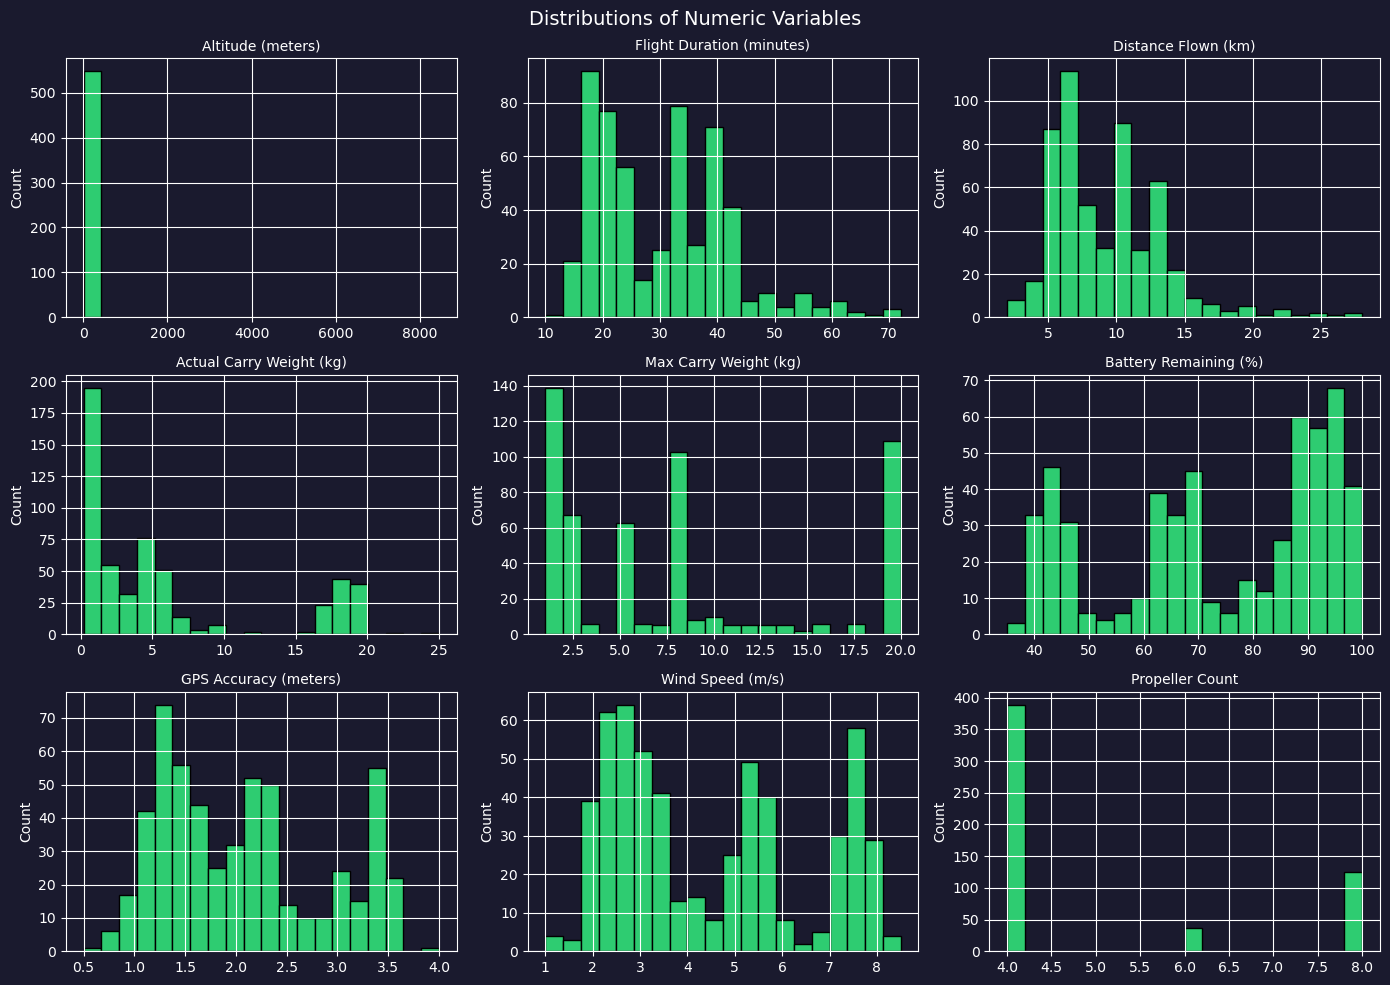

In [232]:
fig, axes = plt.subplots(3, 3, figsize = (14, 10))
fig.patch.set_facecolor(BG_COLOR)
fig.suptitle("Distributions of Numeric Variables", fontsize = 14, color = "white")

plot_cols = [
    "Altitude (meters)", "Flight Duration (minutes)", "Distance Flown (km)",
    "Actual Carry Weight (kg)", "Max Carry Weight (kg)", "Battery Remaining (%)",
    "GPS Accuracy (meters)", "Wind Speed (m/s)", "Propeller Count"]

for i, col in enumerate(plot_cols):
    ax = axes[i // 3, i % 3]
    ax.set_facecolor(BG_COLOR)
    df[col].dropna().hist(bins = 20, ax = ax, color = GREEN, edgecolor = "black")
    ax.set_title(col, fontsize = 10, color = "white")
    ax.set_ylabel("Count", color = "white")
    ax.tick_params(colors = "white")

plt.tight_layout()
plt.show()

### 5.2 Categorical Bar Charts

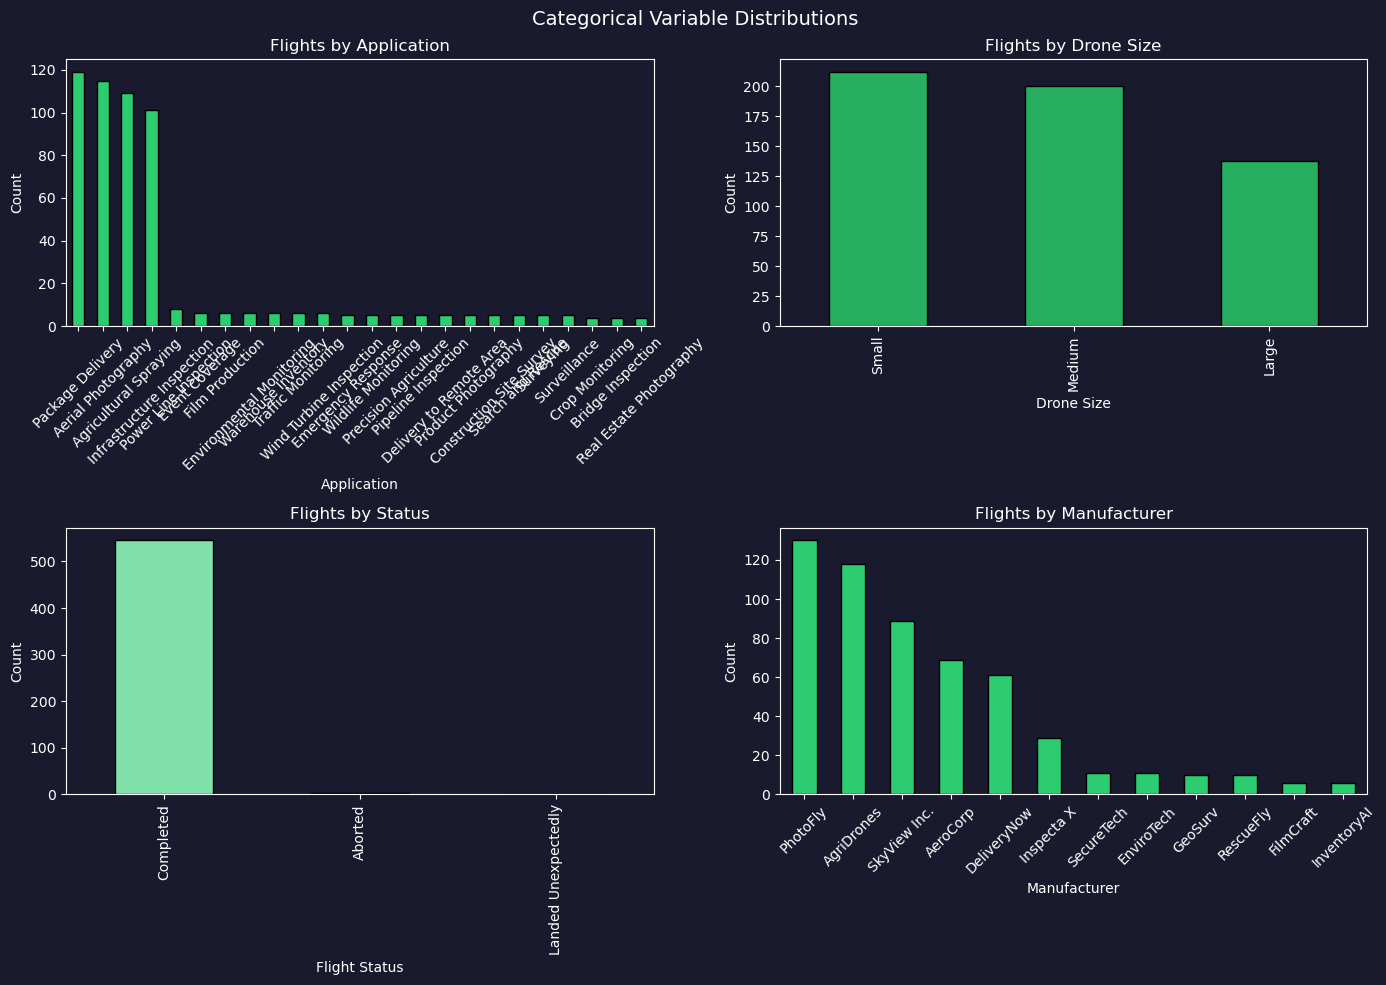

In [233]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.patch.set_facecolor(BG_COLOR)
fig.suptitle("Categorical Variable Distributions", fontsize = 14, color = "white")

# Application type counts
ax = axes[0, 0]
ax.set_facecolor(BG_COLOR)
df["Application"].value_counts().plot.bar(ax = ax, color = GREEN, edgecolor = "black")
ax.set_title("Flights by Application", color = "white")
ax.set_ylabel("Count", color = "white")
ax.tick_params(axis = "x", rotation = 45, colors = "white")
ax.tick_params(axis = "y", colors = "white")

# Drone Size distribution
ax = axes[0, 1]
ax.set_facecolor(BG_COLOR)
df["Drone Size"].value_counts().plot.bar(ax = ax, color = DARK_GREEN, edgecolor = "black")
ax.set_title("Flights by Drone Size", color = "white")
ax.set_ylabel("Count", color = "white")
ax.tick_params(colors = "white")

# Flight Status breakdown
ax = axes[1, 0]
ax.set_facecolor(BG_COLOR)
df["Flight Status"].value_counts().plot.bar(ax = ax, color = LIGHT_GREEN, edgecolor = "black")
ax.set_title("Flights by Status", color = "white")
ax.set_ylabel("Count", color = "white")
ax.tick_params(colors = "white")

# Manufacturer breakdown
ax = axes[1, 1]
ax.set_facecolor(BG_COLOR)
df["Manufacturer"].value_counts().plot.bar(ax = ax, color = GREEN, edgecolor = "black")
ax.set_title("Flights by Manufacturer", color = "white")
ax.set_ylabel("Count", color = "white")
ax.tick_params(axis = "x", rotation = 45, colors = "white")
ax.tick_params(axis = "y", colors = "white")

plt.tight_layout()
plt.show()

### 5.3 Correlation Analysis
Scatter matrix with Spearman correlation coefficients and heatmap.

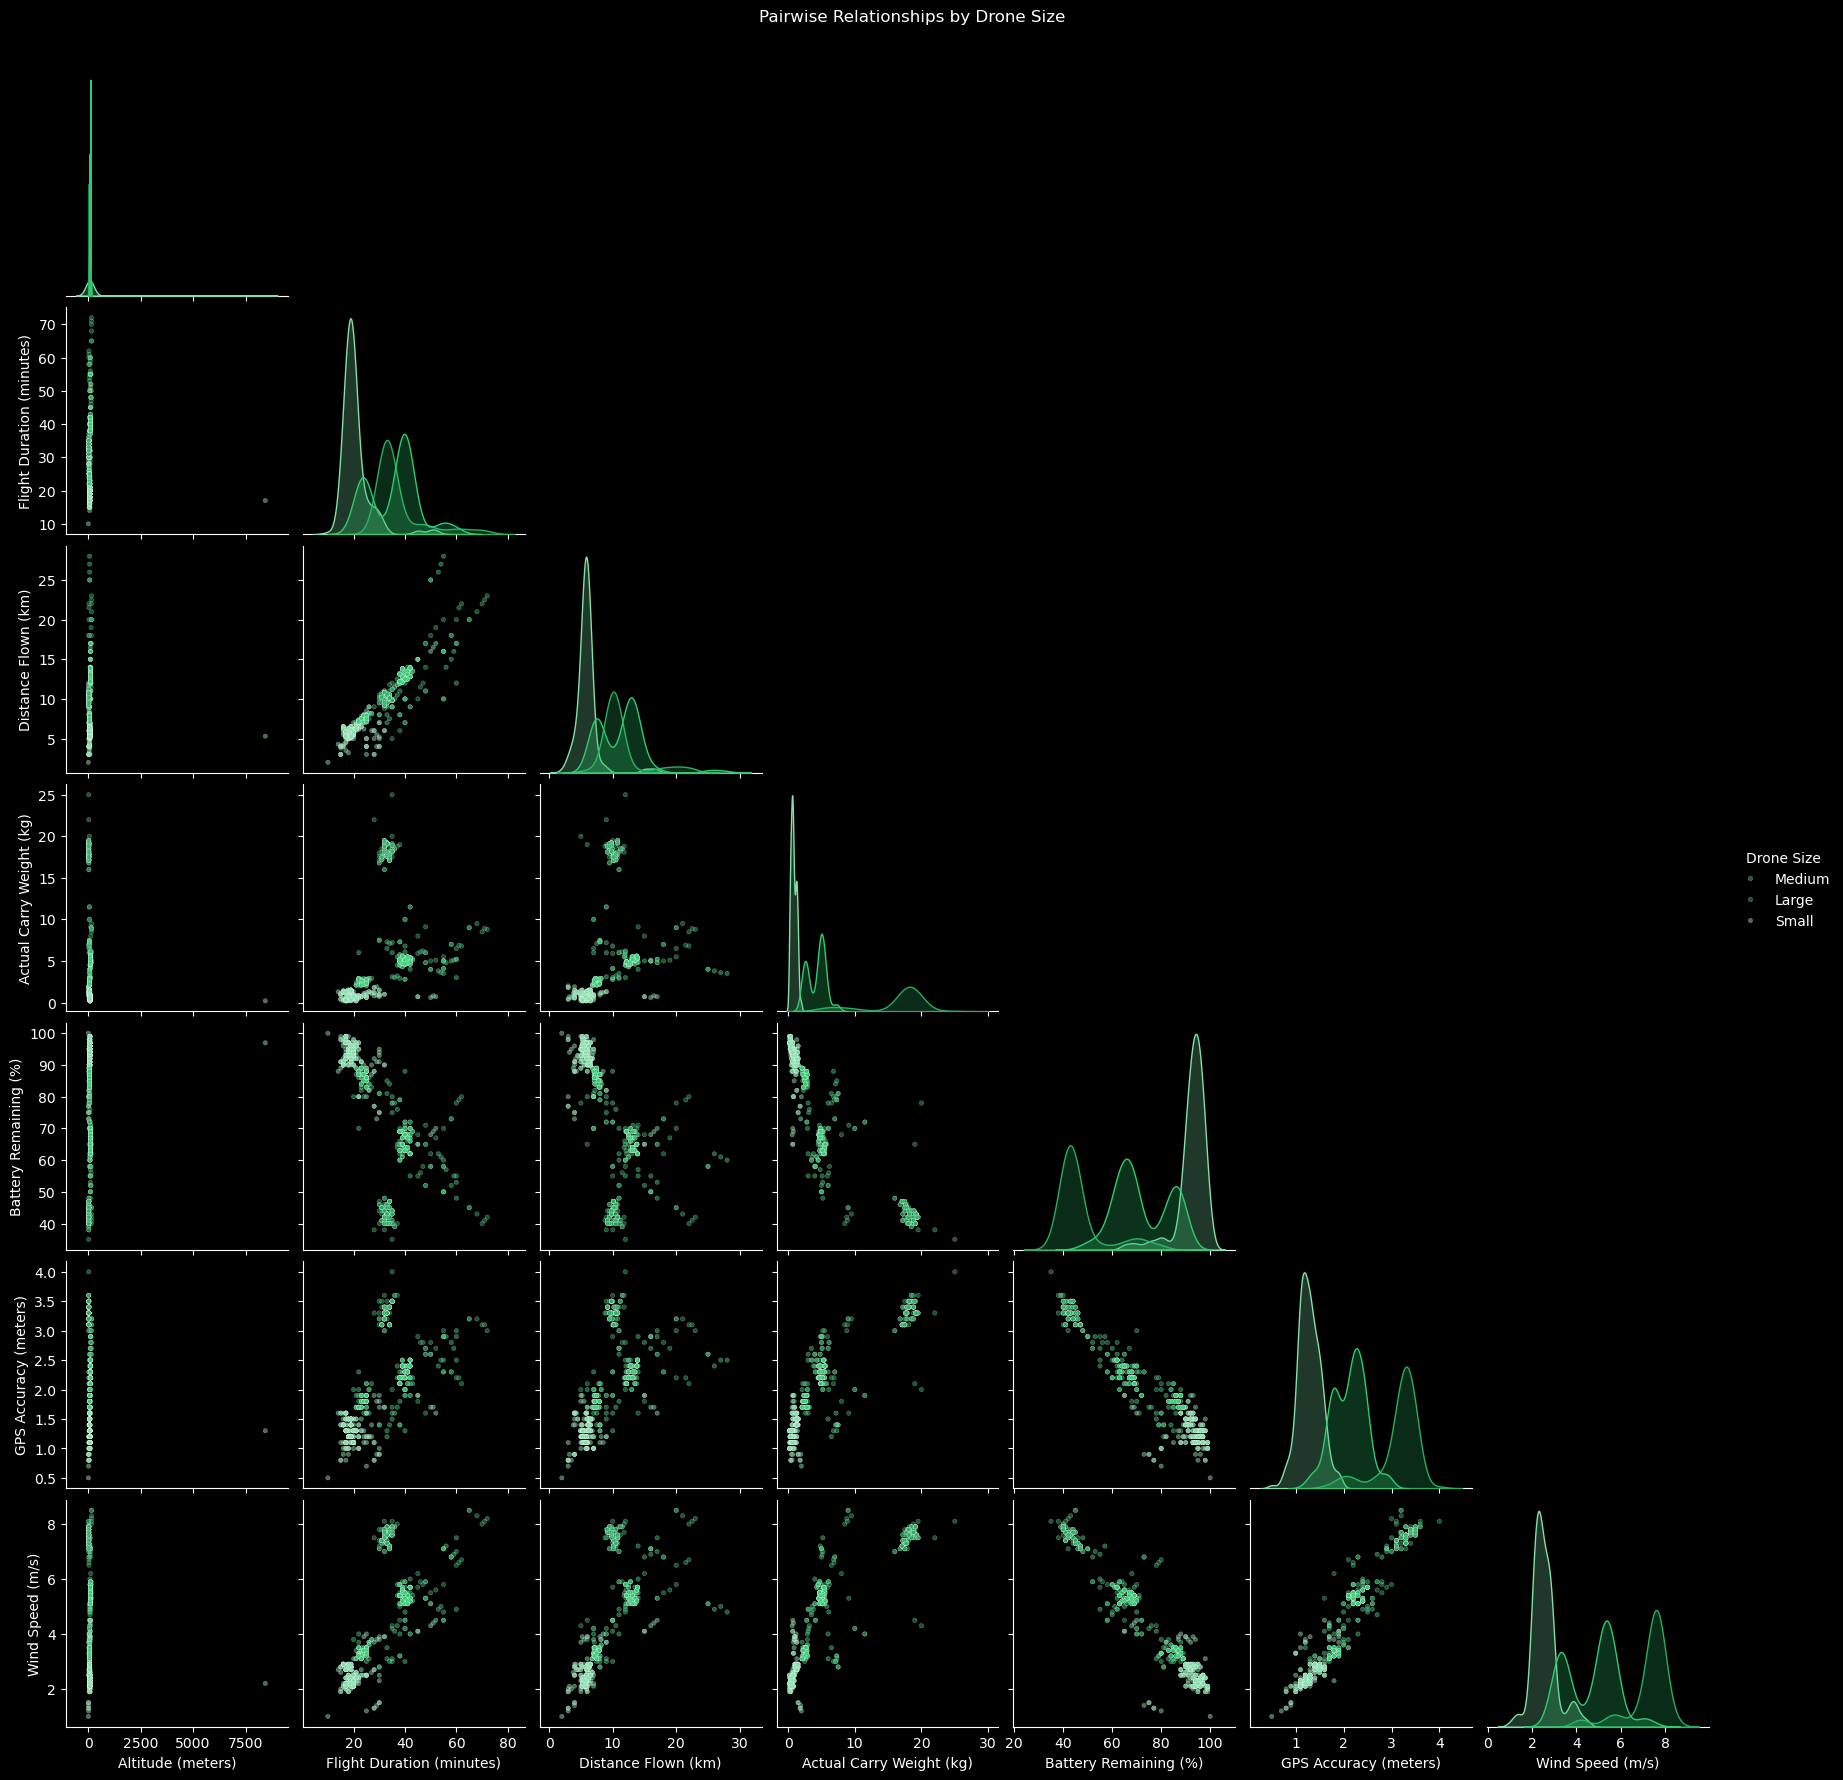

Variable pairs with |Spearman correlation| > 0.8:

  Flight Duration (minutes)  vs  Distance Flown (km):  0.903
  Actual Carry Weight (kg)  vs  Battery Remaining (%):  -0.926
  Actual Carry Weight (kg)  vs  GPS Accuracy (meters):  0.900
  Actual Carry Weight (kg)  vs  Wind Speed (m/s):  0.918
  Battery Remaining (%)  vs  GPS Accuracy (meters):  -0.924
  Battery Remaining (%)  vs  Wind Speed (m/s):  -0.938
  GPS Accuracy (meters)  vs  Wind Speed (m/s):  0.956


In [234]:
corr_cols = ["Altitude (meters)", "Flight Duration (minutes)", "Distance Flown (km)",
             "Actual Carry Weight (kg)", "Battery Remaining (%)",
             "GPS Accuracy (meters)", "Wind Speed (m/s)"]

# Pairplot of key numeric variables colored by Drone Size (no duplicate comparisons)
sns.pairplot(df[corr_cols + ["Drone Size"]], hue = "Drone Size",
             corner = True, plot_kws = {"s": 10, "alpha": 0.5})
plt.suptitle("Pairwise Relationships by Drone Size", y = 1.02)
plt.show()

# Print variable pairs with |Spearman correlation| > 0.8
corr_df = df[corr_cols].corr(method = "spearman")
print("Variable pairs with |Spearman correlation| > 0.8:\n")
for i in range(len(corr_df.columns)):
    for j in range(i + 1, len(corr_df.columns)):
        val = corr_df.iloc[i, j]
        if abs(val) > 0.8:
            print(f"  {corr_df.columns[i]}  vs  {corr_df.columns[j]}:  {val:.3f}")

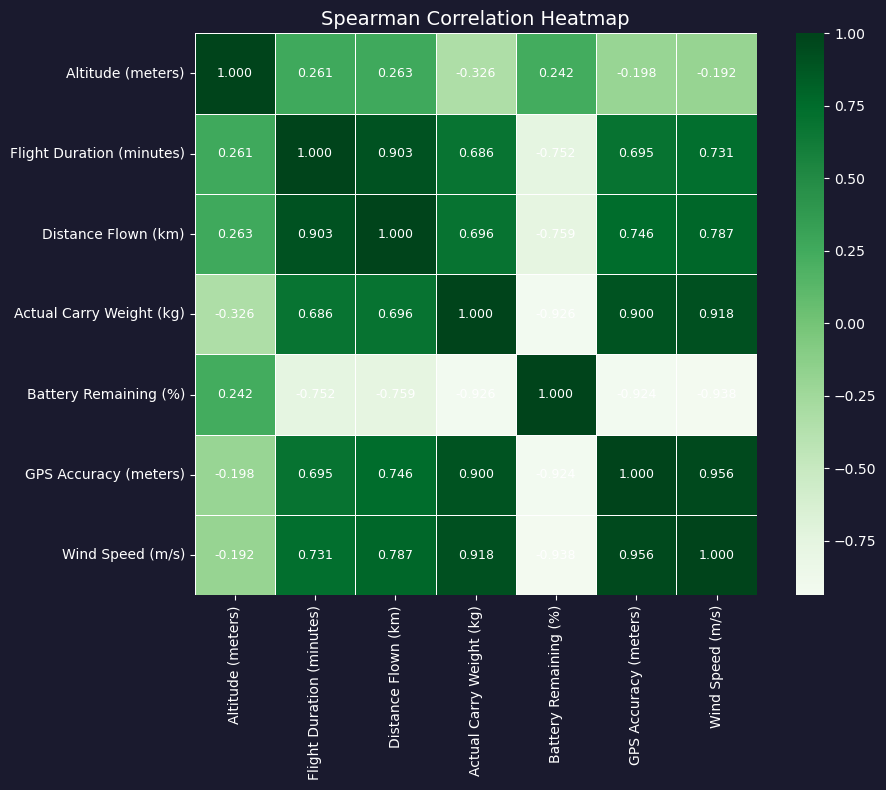

In [235]:
# Seaborn heatmap of correlations
fig, ax = plt.subplots(figsize = (10, 8))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
corr_df = df[corr_cols].corr(method = "spearman")
sns.heatmap(corr_df, annot = True, fmt = ".3f", cmap = "Greens", center = 0,
            square = True, linewidths = 0.5, ax = ax,
            annot_kws = {"color": "white", "fontsize": 9})
ax.set_title("Spearman Correlation Heatmap", color = "white", fontsize = 14)
ax.tick_params(colors = "white")
plt.tight_layout()
plt.show()

### 5.4 Box Plots by Drone Size

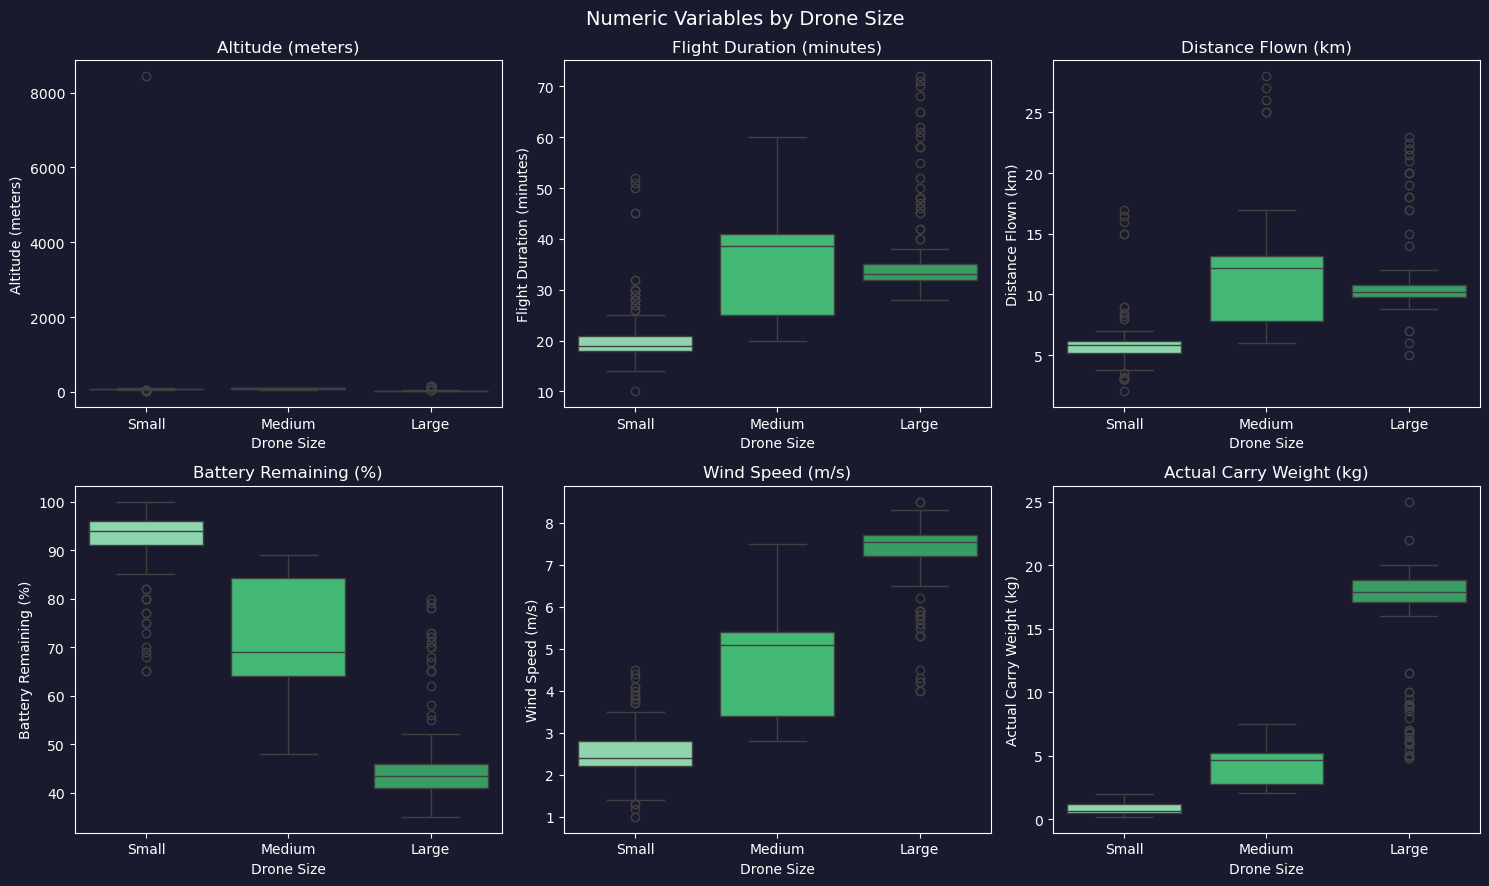

In [236]:
fig, axes = plt.subplots(2, 3, figsize = (15, 9))
fig.patch.set_facecolor(BG_COLOR)
fig.suptitle("Numeric Variables by Drone Size", fontsize = 14, color = "white")

box_cols = ["Altitude (meters)", "Flight Duration (minutes)", "Distance Flown (km)",
            "Battery Remaining (%)", "Wind Speed (m/s)", "Actual Carry Weight (kg)"]

box_palette = {"Small": LIGHT_GREEN, "Medium": GREEN, "Large": DARK_GREEN}

for i, col in enumerate(box_cols):
    ax = axes[i // 3, i % 3]
    ax.set_facecolor(BG_COLOR)
    sns.boxplot(data = df, x = "Drone Size", y = col, ax = ax,
                order = ["Small", "Medium", "Large"], hue = "Drone Size",
                palette = box_palette, legend = False)
    ax.set_title(col, color = "white")
    ax.tick_params(colors = "white")
    ax.set_xlabel("Drone Size", color = "white")
    ax.set_ylabel(col, color = "white")

plt.tight_layout()
plt.show()

### 5.5 Box Plots by Flight Status

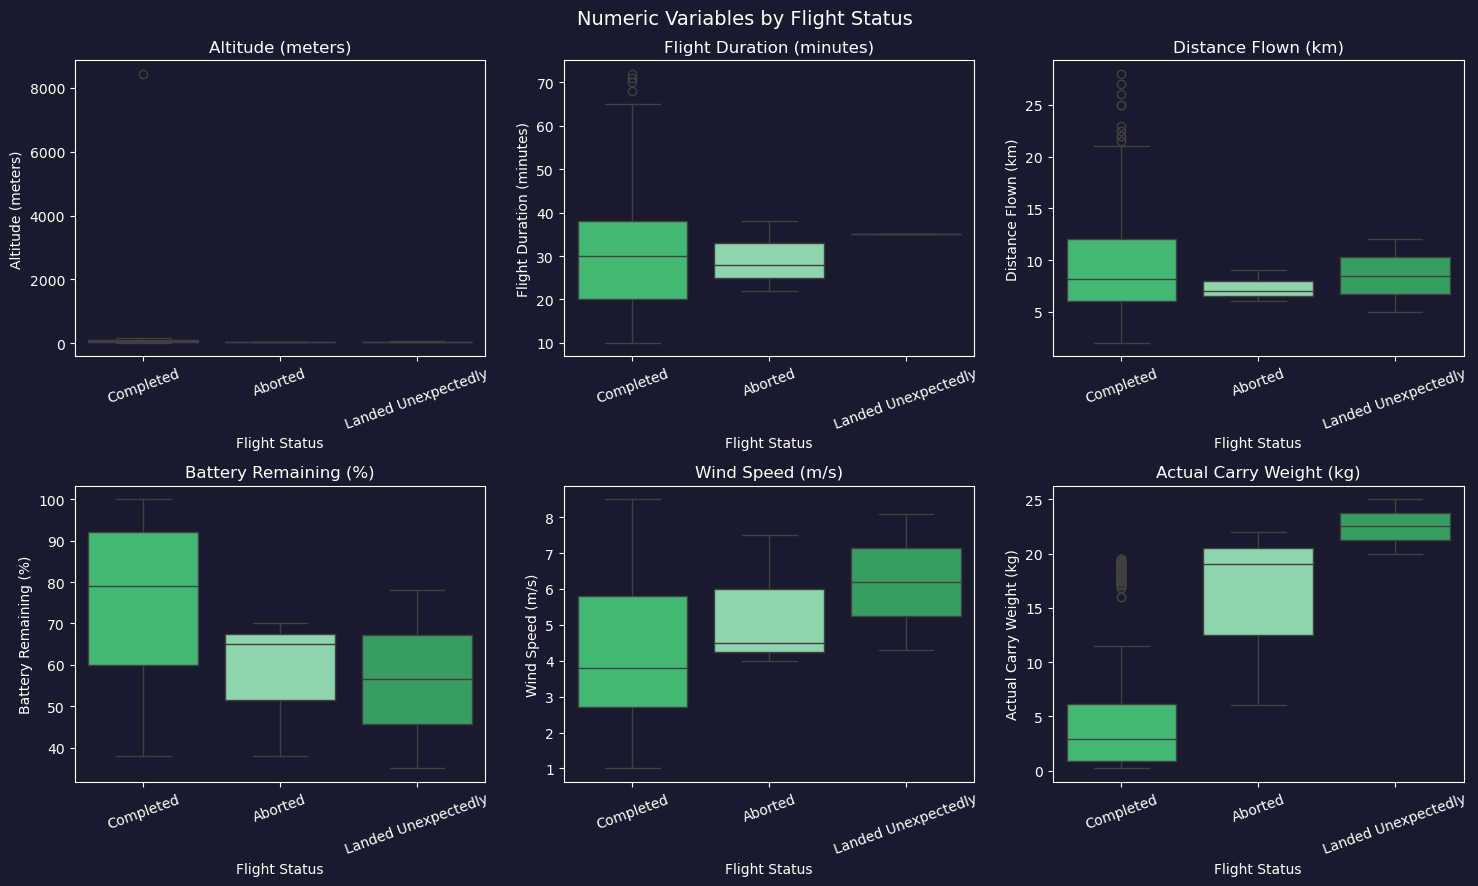

In [237]:
fig, axes = plt.subplots(2, 3, figsize = (15, 9))
fig.patch.set_facecolor(BG_COLOR)
fig.suptitle("Numeric Variables by Flight Status", fontsize = 14, color = "white")

status_palette = {"Completed": GREEN, "Aborted": LIGHT_GREEN,
                  "Landed Unexpectedly": DARK_GREEN}

for i, col in enumerate(box_cols):
    ax = axes[i // 3, i % 3]
    ax.set_facecolor(BG_COLOR)
    sns.boxplot(data = df, x = "Flight Status", y = col, ax = ax,
                hue = "Flight Status", palette = status_palette, legend = False)
    ax.set_title(col, color = "white")
    ax.tick_params(axis = "x", rotation = 20, colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    ax.set_xlabel("Flight Status", color = "white")
    ax.set_ylabel(col, color = "white")

plt.tight_layout()
plt.show()

### 5.6 Time Series: Monthly Flight Counts

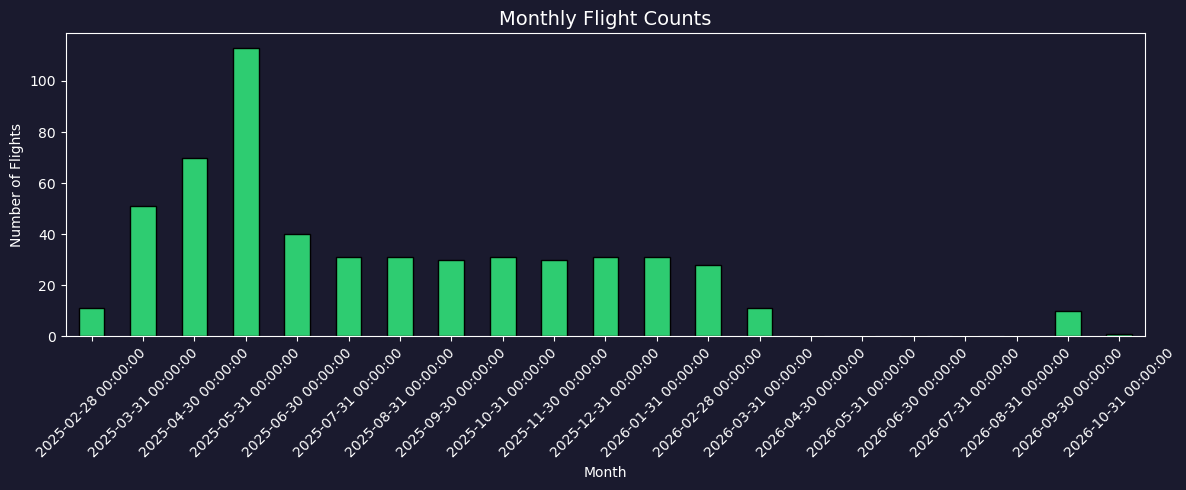

In [238]:
df_dated = df.dropna(subset = ["Flight Date"])
monthly_counts = df_dated.set_index("Flight Date").resample("ME").size()

fig, ax = plt.subplots(figsize = (12, 5))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
monthly_counts.plot(kind = "bar", color = GREEN, edgecolor = "black", ax = ax)
ax.set_title("Monthly Flight Counts", color = "white", fontsize = 14)
ax.set_xlabel("Month", color = "white")
ax.set_ylabel("Number of Flights", color = "white")
ax.tick_params(axis = "x", rotation = 45, colors = "white")
ax.tick_params(axis = "y", colors = "white")
plt.tight_layout()
plt.show()

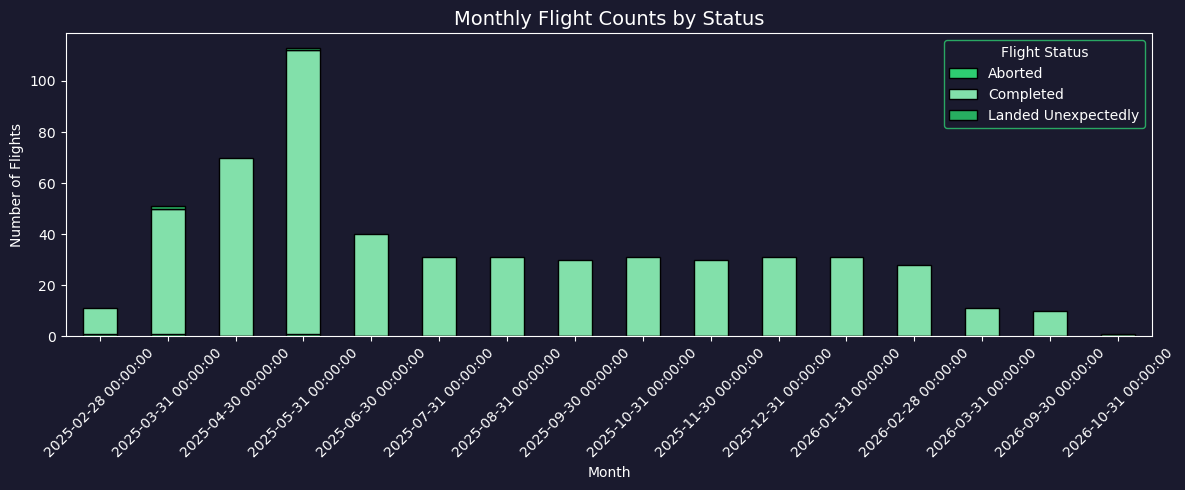

In [239]:
# Monthly counts by Flight Status
monthly_status = (df_dated.set_index("Flight Date")
                  .groupby([pd.Grouper(freq = "ME"), "Flight Status"])
                  .size()
                  .unstack(fill_value = 0))

fig, ax = plt.subplots(figsize = (12, 5))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
monthly_status.plot(kind = "bar", stacked = True, ax = ax, edgecolor = "black",
                    color = [GREEN, LIGHT_GREEN, DARK_GREEN])
ax.set_title("Monthly Flight Counts by Status", color = "white", fontsize = 14)
ax.set_xlabel("Month", color = "white")
ax.set_ylabel("Number of Flights", color = "white")
ax.tick_params(axis = "x", rotation = 45, colors = "white")
ax.tick_params(axis = "y", colors = "white")
ax.legend(title = "Flight Status", facecolor = BG_COLOR, edgecolor = GREEN,
          labelcolor = "white", title_fontsize = 10)
plt.tight_layout()
plt.show()

### 5.7 Relationship Plots

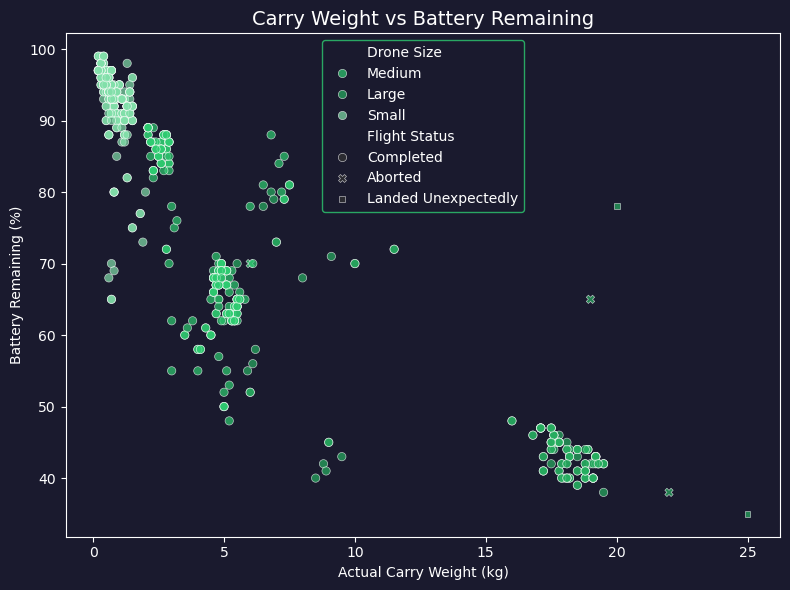

In [240]:
# Carry Weight vs Battery Remaining
fig, ax = plt.subplots(figsize = (8, 6))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
sns.scatterplot(data = df, x = "Actual Carry Weight (kg)", y = "Battery Remaining (%)",
                hue = "Drone Size", style = "Flight Status", alpha = 0.7, ax = ax,
                palette = box_palette)
ax.set_title("Carry Weight vs Battery Remaining", color = "white", fontsize = 14)
ax.tick_params(colors = "white")
ax.set_xlabel("Actual Carry Weight (kg)", color = "white")
ax.set_ylabel("Battery Remaining (%)", color = "white")
ax.legend(facecolor = BG_COLOR, edgecolor = GREEN, labelcolor = "white")
plt.tight_layout()
plt.show()

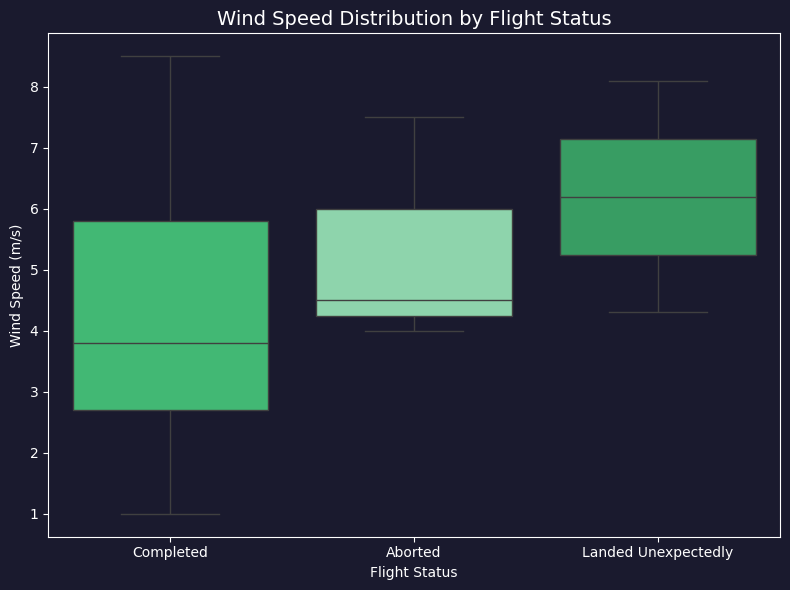

In [241]:
# Wind Speed vs Flight Status
fig, ax = plt.subplots(figsize = (8, 6))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
sns.boxplot(data = df, x = "Flight Status", y = "Wind Speed (m/s)", ax = ax,
            hue = "Flight Status", palette = status_palette, legend = False)
ax.set_title("Wind Speed Distribution by Flight Status", color = "white", fontsize = 14)
ax.tick_params(colors = "white")
ax.set_xlabel("Flight Status", color = "white")
ax.set_ylabel("Wind Speed (m/s)", color = "white")
plt.tight_layout()
plt.show()

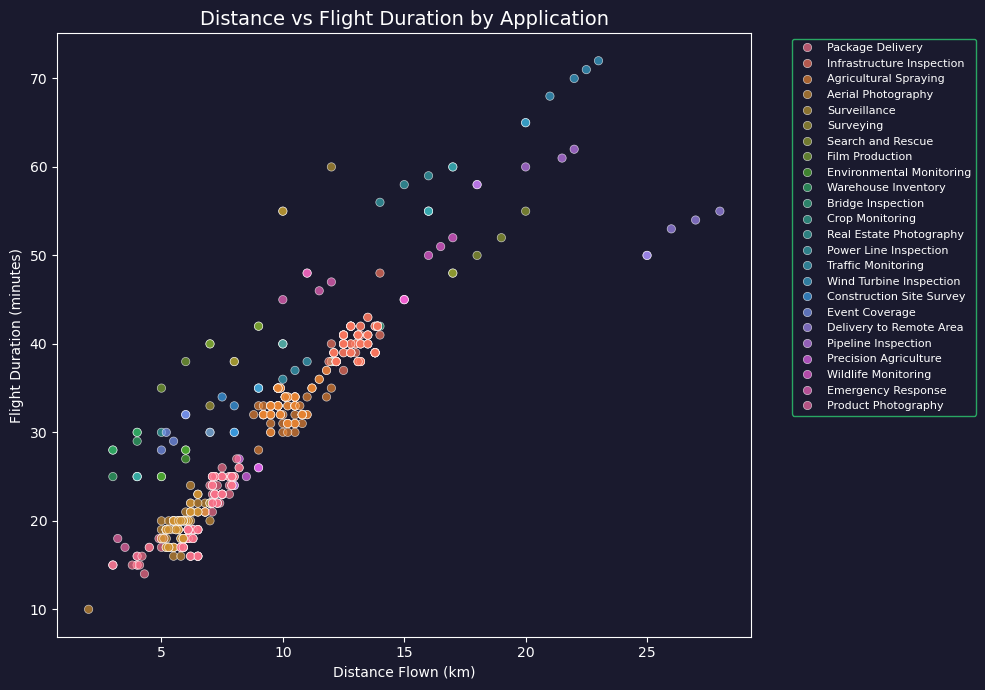

In [242]:
# Distance vs Duration colored by Application
fig, ax = plt.subplots(figsize = (10, 7))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
sns.scatterplot(data = df, x = "Distance Flown (km)", y = "Flight Duration (minutes)",
                hue = "Application", alpha = 0.7, ax = ax)
ax.set_title("Distance vs Flight Duration by Application", color = "white", fontsize = 14)
ax.tick_params(colors = "white")
ax.set_xlabel("Distance Flown (km)", color = "white")
ax.set_ylabel("Flight Duration (minutes)", color = "white")
ax.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", fontsize = 8,
          facecolor = BG_COLOR, edgecolor = GREEN, labelcolor = "white")
plt.tight_layout()
plt.show()

## Section 6: Cleaning Report and Notable EDA Findings

### Cleaning Report

**Original CSV:** 555 flight records across 22 columns. After loading with pandas, 552 rows were parsed successfully.

- 2 rows (D027, D074) were skipped during CSV parsing because their Payload Type field 'Camera, Sensor' was not quoted, causing a column count mismatch (23 fields instead of 22).
- 2 blank lines in the CSV were automatically skipped by pandas.

**Cleaning steps applied:**
1. Dropped completely empty rows
2. Fixed 2 invalid Drone Size values: D619 had '52' and D819 had '523' (both mapped to 'Small')
3. Converted all numeric columns to proper float/int types
4. Replaced 2 negative carry weights with NaN (D029: -0.2 kg, D085: -0.1 kg)
5. Converted Flight Date strings to datetime objects
6. Added 'Overweight Flag' column (Actual > Max carry weight)
7. Removed 2 corrupted duplicate entries: D619 and D819 were broken copies of D519

**Remaining data notes:**
- Actual Carry Weight (kg): 4 missing values (kept as NaN)
- Flight Duration (minutes): 2 missing values (kept as NaN)
- Notes: 496 missing (free-text field, expected to be sparse)

### Notable EDA Findings

1. **Flight Success Rate:** 545/550 flights completed (99.1%). 3 aborted, 2 landed unexpectedly.

2. **Overweight Flights and Failure:** All 5 overweight flights resulted in non-Completed status (3 Aborted, 2 Landed Unexpectedly). This suggests payload weight exceeding max capacity is a strong predictor of flight failure — useful for ML modeling.

3. **Application Dominance:** Top 3 application types account for 62.4% of all flights: Package Delivery (119), Aerial Photography (115), Agricultural Spraying (109).

4. **Drone Size Patterns:**

| Size | Avg Altitude | Avg Duration | Avg Distance |
|------|-------------|-------------|-------------|
| Small | 114.7 m | 20.5 min | 5.9 km |
| Medium | 90.0 m | 35.7 min | 11.3 km |
| Large | 46.4 m | 37.1 min | 11.2 km |

5. **Wind Speed and Flight Outcomes:** Average wind speed for completed flights: 4.47 m/s. Average for failed flights: 5.68 m/s.

6. **Battery and Payload Relationship:** Spearman correlation (Battery vs Carry Weight): -0.926. Spearman correlation (Battery vs Distance): -0.759.

7. **Temporal Coverage:** Date range: 2025-02-18 to 2026-10-01 (approximately 590 days).

In [243]:
# Verify key findings programmatically
print(f"Flight Success Rate: {(df['Flight Status'] == 'Completed').sum()}/{len(df)} "
      f"({(df['Flight Status'] == 'Completed').mean() * 100:.1f}%)")

print(f"\nOverweight flights: {df['Overweight Flag'].sum()}")
print("Overweight by status:")
print(df[df['Overweight Flag'] == True]['Flight Status'].value_counts())

print("\nSpearman correlations:")
corr_bw = df[['Battery Remaining (%)', 'Actual Carry Weight (kg)']].corr(method = 'spearman').iloc[0, 1]
corr_bd = df[['Battery Remaining (%)', 'Distance Flown (km)']].corr(method = 'spearman').iloc[0, 1]
print(f"  Battery vs Carry Weight: {corr_bw:.3f}")
print(f"  Battery vs Distance:     {corr_bd:.3f}")

print(f"\nDate range: {df['Flight Date'].min().strftime('%Y-%m-%d')} to "
      f"{df['Flight Date'].max().strftime('%Y-%m-%d')}")
print(f"Spans approximately {(df['Flight Date'].max() - df['Flight Date'].min()).days} days")

Flight Success Rate: 545/550 (99.1%)

Overweight flights: 5
Overweight by status:
Flight Status
Aborted                3
Landed Unexpectedly    2
Name: count, dtype: int64

Spearman correlations:
  Battery vs Carry Weight: -0.926
  Battery vs Distance:     -0.759

Date range: 2025-02-18 to 2026-10-01
Spans approximately 590 days
